# Keras - Predicting Wine Types
### Using the Wine Quality data set

In [1]:
import pandas as pd

### Load Data

In [2]:
white = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', sep=';')

red = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red', sep=';')

### Explore Data

In [3]:
print(white.info())
print(red.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null fl

In [6]:
print(red.head())
print(white.tail())
print(red.sample(5))

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [7]:
print(white.describe())
pd.isnull(red)

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    4898.000000       4898.000000  4898.000000     4898.000000   
mean        6.854788          0.278241     0.334192        6.391415   
std         0.843868          0.100795     0.121020        5.072058   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.700000   
50%         6.800000          0.260000     0.320000        5.200000   
75%         7.300000          0.320000     0.390000        9.900000   
max        14.200000          1.100000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  4898.000000          4898.000000           4898.000000  4898.000000   
mean      0.045772            35.308085            138.360657     0.994027   
std       0.021848            17.007137             42.498065     0.002991   
min       0.009000             2.000000         

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False


## Visualize Some Data
* check the 'alcohol' feature

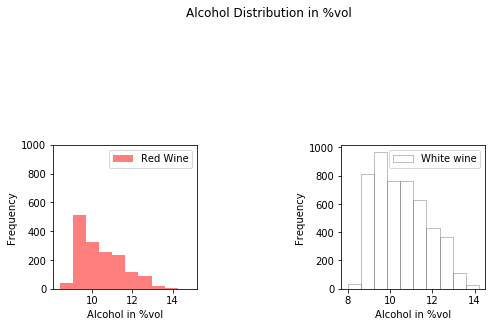

In [9]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2)

ax[0].hist(red.alcohol, 10, facecolor='red', alpha=0.5, label='Red Wine')
ax[1].hist(white.alcohol, 10, facecolor='white', ec='black', lw=0.5, alpha=0.5,
           label='White wine')

fig.subplots_adjust(left=0, right=1, bottom=0, top=0.5, hspace=0.05, wspace=1)

ax[0].set_ylim([0,1000])
ax[0].set_xlabel('Alcohol in %vol')
ax[0].set_ylabel('Frequency')

ax[1].set_xlabel('Alcohol in %vol')
ax[1].set_ylabel('Frequency')

ax[0].legend(loc='best')
ax[1].legend(loc='best')

fig.suptitle('Alcohol Distribution in %vol')
plt.show();

#### Can also check the content of these visualizations with numpy

In [10]:
import numpy as np

print(np.histogram(red.alcohol, bins=[7,8,9,10,11,12,13,14,15]))
print(np.histogram(white.alcohol, bins=[7,8,9,10,11,12,13,14,15]))

(array([  0,   7, 673, 452, 305, 133,  21,   8]), array([ 7,  8,  9, 10, 11, 12, 13, 14, 15]))
(array([   0,  317, 1606, 1256,  906,  675,  131,    7]), array([ 7,  8,  9, 10, 11, 12, 13, 14, 15]))


* check the 'sulfates' feature

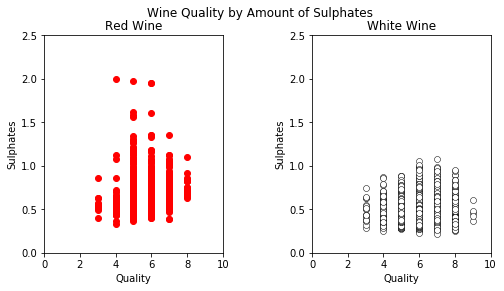

In [12]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(8,4))

ax[0].scatter(red['quality'], red['sulphates'], color='red')
ax[1].scatter(white['quality'], white['sulphates'], color='white', edgecolors='black', lw=0.5)

ax[0].set_title('Red Wine')
ax[1].set_title('White Wine')
ax[0].set_xlabel('Quality')
ax[1].set_xlabel('Quality')
ax[0].set_ylabel('Sulphates')
ax[1].set_ylabel('Sulphates')
ax[0].set_xlim([0,10])
ax[1].set_xlim([0,10])
ax[0].set_ylim([0,2.5])
ax[1].set_ylim([0,2.5])

fig.subplots_adjust(wspace=0.5)
fig.suptitle('Wine Quality by Amount of Sulphates')
plt.show()

#### The red seems to have more sulfates than the white
### Plot alcohol content vs. volatile acidity

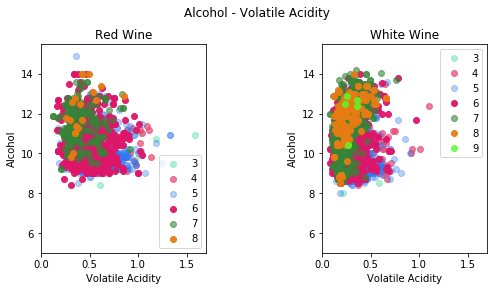

In [15]:
np.random.seed(570)

redlabels = np.unique(red['quality'])
whitelabels = np.unique(white['quality'])

fig, ax = plt.subplots(1, 2, figsize=(8,4))
redcolors = np.random.rand(6,4)
whitecolors = np.append(redcolors, np.random.rand(1,4), axis=0)

for i in range(len(redcolors)):
    redy = red['alcohol'][red.quality == redlabels[i]]
    redx = red['volatile acidity'][red.quality == redlabels[i]]
    ax[0].scatter(redx, redy, c=redcolors[i])
    
for i in range(len(whitecolors)):
    whitey = white['alcohol'][white.quality == whitelabels[i]]
    whitex = white['volatile acidity'][white.quality == whitelabels[i]]
    ax[1].scatter(whitex, whitey, c=whitecolors[i])
    
ax[0].set_title('Red Wine')
ax[1].set_title('White Wine')
ax[0].set_xlim([0,1.7])
ax[1].set_xlim([0,1.7])
ax[0].set_ylim([5, 15.5])
ax[1].set_ylim([5, 15.5])
ax[0].set_xlabel('Volatile Acidity')
ax[1].set_xlabel('Volatile Acidity')
ax[0].set_ylabel('Alcohol')
ax[1].set_ylabel('Alcohol')

ax[0].legend(redlabels, loc='best')
ax[1].legend(whitelabels, loc='best')

fig.suptitle('Alcohol - Volatile Acidity')
fig.subplots_adjust(top=0.85, wspace=0.7)
plt.show()

#### White wines typically have less volatile acidity
## Preprocess the Data
* prepare data for neural network

In [16]:
red['type'] = 1
white['type'] = 0

wines = red.append(white, ignore_index=True)

# ignore_index=True - keeps the labels from red, ignores white labels when combining

### Plot a Correlation Matrix

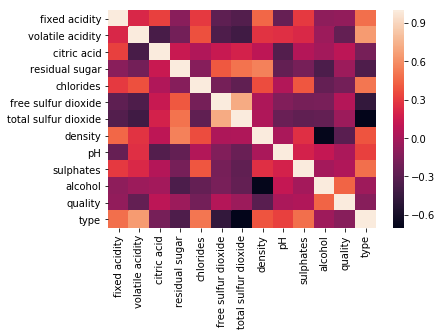

In [18]:
import seaborn as sns

corr = wines.corr()

sns.heatmap(corr,
           xticklabels=corr.columns.values,
           yticklabels=corr.columns.values)
plt.show()

#### Appears to be correlations between 
* 'density' and 'residual sugar'
* between 'free sulfur dioxide' and 'total sulfur dioxide'
* between 'type' and 'volatile acidity'

### Test and Training Sets

In [19]:
from sklearn.model_selection import train_test_split

X = wines.ix[:,0:11]
y = np.ravel(wines.type)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


### Standardize the Data - using StandardScaler( )
* many values are very far apart

In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Build Model
* two output classes (red/white) - Binary Classification
* neural networks need numerical data - wines have been encoded to 1 and 0
* use a multi-layer perceptron - specifically a fully-connected neural network
* do this with a Sequential model - linear stack of layers
* Dense (fully-connected layer) -> output = activation(dot(input,kernel)+bias)
    * NOTE - without activation, Dense layer is just Dot product and Addition
* activation - ReLU
* Dense output shape - (*,12)
* Intermediate layer output shape - (*,8)
* Final Dense layer - sigmoid activation 

In [39]:
# keras uses tensorflow backend - with 2.0, 'tensorflow.' must be added to import

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

model.add(Dense(12, activation='relu', input_shape=(11,)))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

#### There are 12 hidden layers in the 1st layer - setting the dimensionality of the output space

In [40]:
model.output_shape

(None, 1)

In [41]:
model.summary

<bound method Network.summary of <tensorflow.python.keras.engine.sequential.Sequential object at 0x1a32bb9438>>

In [42]:
model.get_config()

{'name': 'sequential_3',
 'layers': [{'class_name': 'Dense',
   'config': {'name': 'dense_6',
    'trainable': True,
    'batch_input_shape': (None, 11),
    'dtype': 'float32',
    'units': 12,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_7',
    'trainable': True,
    'dtype': 'float32',
    'units': 8,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': No

In [43]:
model.get_weights()

[array([[-0.00133634,  0.48239845,  0.26530272, -0.2336179 ,  0.37283164,
         -0.20640647,  0.4063056 ,  0.31040895, -0.25013316, -0.08557808,
         -0.3767839 ,  0.26774216],
        [-0.10081801, -0.17292053, -0.19676226,  0.1394704 , -0.45755512,
         -0.3248213 ,  0.14920777, -0.01536828, -0.1268681 , -0.17713803,
         -0.18923631, -0.17398581],
        [ 0.28101617,  0.501216  ,  0.35547918, -0.09736037,  0.03665984,
          0.4826718 ,  0.4471867 , -0.43037093, -0.1941981 , -0.27246577,
          0.11071986,  0.40738356],
        [ 0.10808748, -0.417094  , -0.22519183,  0.20426643,  0.1856798 ,
         -0.25637612,  0.48850363, -0.33959192, -0.23273468, -0.30225623,
          0.23068625,  0.32064182],
        [ 0.04304463, -0.09477183, -0.06629506, -0.15193695,  0.2956134 ,
          0.11129344,  0.25704187, -0.40929186,  0.24679643, -0.50808537,
         -0.06602314, -0.10860115],
        [-0.44154775,  0.21755993, -0.15652439,  0.39337903, -0.5098825 ,
      

## Compile Model & Fit

In [44]:
model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

model.fit(X_train, y_train, epochs=20, batch_size=1, verbose=1)

# verbose = 1 - allows viewing the progress bar

Epoch 1/20
4352/4352 [==============================] - 7s 2ms/sample - loss: 0.1124 - accuracy: 0.9625
Epoch 2/20
4352/4352 [==============================] - 7s 2ms/sample - loss: 0.0318 - accuracy: 0.99310s - l
Epoch 3/20
4352/4352 [==============================] - 8s 2ms/sample - loss: 0.0245 - accuracy: 0.9949
Epoch 4/20
4352/4352 [==============================] - 7s 2ms/sample - loss: 0.0196 - accuracy: 0.99610s - l
Epoch 5/20
4352/4352 [==============================] - 7s 2ms/sample - loss: 0.0175 - accuracy: 0.9963
Epoch 6/20
4352/4352 [==============================] - 6s 1ms/sample - loss: 0.0164 - accuracy: 0.9970
Epoch 7/20
4352/4352 [==============================] - 7s 2ms/sample - loss: 0.0147 - accuracy: 0.9972
Epoch 8/20
4352/4352 [==============================] - 7s 2ms/sample - loss: 0.0147 - accuracy: 0.9970
Epoch 9/20
4352/4352 [==============================] - 7s 2ms/sample - loss: 0.0117 - accuracy: 0.99750s - loss: 0.0117 - accuracy: 0.99
Epoch 10/20
4352/4

## Predict Values

In [45]:
y_pred = model.predict(X_test)

In [46]:
y_pred[:5]

array([[6.5854073e-02],
       [9.9090874e-01],
       [1.9639730e-05],
       [1.4901161e-07],
       [0.0000000e+00]], dtype=float32)

In [47]:
y_test[:5]

array([0, 1, 0, 0, 0])

## Evaluate Model

In [48]:
score = model.evaluate(X_test, y_test, verbose=1)

print(score)

2145/2145 [==============================] - 0s 62us/sample - loss: 0.0272 - accuracy: 0.9949
[0.0272462072744838, 0.9948718]


### Other classification evaluation metrics that can be used
* confusion matrix
* precision score
* recall score
* f1 score
* cohen kappa score